## Summary

This notebook examines population trends for individuals aged 65 and older over the past 10 years. 

It highlights how the population of this age group has evolved over time and provides a gender-based comparison, analyzing trends for males and females separately. 

Additionally, it contrasts the population trends of District 7 against the citywide averages for this demographic, offering insights into regional differences. 

The dataset used for this analysis can be accessed at: [Census Data Table](https://data.census.gov/table/ACSDP5Y2013.DP05?q=demographics&g=060XX00US2502507000&moe=false).

# Over 65 years Analysis for District 7

## Importing Libraries

In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-processing data for years - 2022 to 2013

### 2022

In [562]:
df_2022 = pd.read_csv('over65_2022.csv')
df_2022 = df_2022.loc[:, ~df_2022.columns.str.contains('percent', case=False)]
df_2022 = df_2022.replace(',', '', regex=True)
df_2022

,Label (Grouping),Census Tract 102.06; Suffolk County; Massachusetts!!Estimate,Census Tract 103; Suffolk County; Massachusetts!!Estimate,Census Tract 104.03; Suffolk County; Massachusetts!!Estimate,Census Tract 104.04; Suffolk County; Massachusetts!!Estimate,Census Tract 104.05; Suffolk County; Massachusetts!!Estimate,Census Tract 105; Suffolk County; Massachusetts!!Estimate,Census Tract 106; Suffolk County; Massachusetts!!Estimate,Census Tract 705.02; Suffolk County; Massachusetts!!Estimate,Census Tract 706; Suffolk County; Massachusetts!!Estimate,...,Census Tract 906; Suffolk County; Massachusetts!!Estimate,Census Tract 907; Suffolk County; Massachusetts!!Estimate,Census Tract 913; Suffolk County; Massachusetts!!Estimate,Census Tract 914; Suffolk County; Massachusetts!!Estimate,Census Tract 924; Suffolk County; Massachusetts!!Estimate,Census Tract 1101.05; Suffolk County; Massachusetts!!Estimate,Census Tract 1202.01; Suffolk County; Massachusetts!!Estimate,Census Tract 1203.01; Suffolk County; Massachusetts!!Estimate,Census Tract 9803; Suffolk County; Massachusetts!!Estimate,Census Tract 9811; Suffolk County; Massachusetts!!Estimate
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,2218,4769,2665,4585,5921,3330,3174,3787,2228,...,2408,4111,2469,3052,6136,2677,4459,4929,287,91
2,Male,1197,1846,1521,1983,2404,1502,1478,1831,1081,...,1318,1844,1140,1310,2358,1164,2488,2420,214,91
3,Female,1021,2923,1144,2602,3517,1828,1696,1956,1147,...,1090,2267,1329,1742,3778,1513,1971,2509,73,0
4,Sex ratio (males per 100 females),117.2,63.2,133.0,76.2,68.4,82.2,87.1,93.6,94.2,...,120.9,81.3,85.8,75.2,62.4,76.9,126.2,96.5,293.2,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Total housing units,1305,266,2056,1577,919,2130,2797,2159,1241,...,927,2176,955,1211,2339,1236,2285,2156,0,4
92,CITIZEN VOTING AGE POPULATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Citizen 18 and over population,1962,4171,1694,3764,4881,2263,2420,2894,1778,...,1602,3388,1605,2035,3759,2298,3230,3530,254,90
94,Male,1062,1496,877,1670,2025,1068,1209,1324,911,...,853,1411,775,796,1539,935,1754,1605,200,90


#### Extracting the required rows and columns

The code below extracts the Total Population row and the over 65 years rows from the DataFrame, converts its values to float type, and calculates the total population across all the census tracts for District 7 for the particular year by summing the values across columns. It then adds this total as a new column, keeping only the first column and the total population column in the resulting DataFrame.

This is done for all the years from 2022 to 2013.

In [564]:
# Extract the second row of the DataFrame
total_2022 = df_2022.iloc[[1]].copy()  # Using .copy() to avoid working on a slice

# Convert the values (except the first column) to numeric
for col in total_2022.columns[1:]:
    total_2022.loc[:, col] = pd.to_numeric(total_2022[col], errors='coerce')  # Using .loc[] to avoid SettingWithCopyWarning

# Calculate the total population for 2022 by summing the numeric values
total_pop_2022 = total_2022.iloc[:, 1:].sum(axis=1)

# Add the result as a new column
total_2022.loc[:, '2022'] = total_pop_2022  # Using .loc[] to ensure safe modification

# Retain only the first column and the new '2022' column
total_2022 = total_2022.iloc[:, [0, -1]]

# Display the result
total_2022

,Label (Grouping),2022
1,Total population,145022


In [565]:
over65_2022 = df_2022.iloc[29:32].copy()

for col in over65_2022.columns[1:]:
    over65_2022.loc[:, col] = pd.to_numeric(over65_2022[col], errors='coerce')

total_over65_2022 = over65_2022.iloc[:, 1:].sum(axis=1)

# # Add the result as a new column (optional)
over65_2022.loc[:, '2022'] = total_over65_2022

over65_2022 = over65_2022.iloc[:, [0, -1]]
over65_2022

,Label (Grouping),2022
29,65 years and over,16364
30,Male,6839
31,Female,9525


Concating the relevant columns for that particular year

In [567]:
over65_2022_f = pd.concat([total_2022, over65_2022], ignore_index=True)
over65_2022_f

,Label (Grouping),2022
0,Total population,145022
1,65 years and over,16364
2,Male,6839
3,Female,9525


## 2021

In [569]:
df_2021 = pd.read_csv('over65_2021.csv')
df_2021 = df_2021.loc[:, ~df_2021.columns.str.contains('percent', case=False)]
df_2021 = df_2021.replace(',', '', regex=True)
df_2021

,Label (Grouping),"Census Tract 102.06, Suffolk County, Massachusetts!!Estimate","Census Tract 103, Suffolk County, Massachusetts!!Estimate","Census Tract 104.03, Suffolk County, Massachusetts!!Estimate","Census Tract 104.04, Suffolk County, Massachusetts!!Estimate","Census Tract 104.05, Suffolk County, Massachusetts!!Estimate","Census Tract 105, Suffolk County, Massachusetts!!Estimate","Census Tract 106, Suffolk County, Massachusetts!!Estimate","Census Tract 705.02, Suffolk County, Massachusetts!!Estimate","Census Tract 706, Suffolk County, Massachusetts!!Estimate",...,"Census Tract 906, Suffolk County, Massachusetts!!Estimate","Census Tract 907, Suffolk County, Massachusetts!!Estimate","Census Tract 913, Suffolk County, Massachusetts!!Estimate","Census Tract 914, Suffolk County, Massachusetts!!Estimate","Census Tract 924, Suffolk County, Massachusetts!!Estimate","Census Tract 1101.05, Suffolk County, Massachusetts!!Estimate","Census Tract 1202.01, Suffolk County, Massachusetts!!Estimate","Census Tract 1203.01, Suffolk County, Massachusetts!!Estimate","Census Tract 9803, Suffolk County, Massachusetts!!Estimate","Census Tract 9811, Suffolk County, Massachusetts!!Estimate"
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,2039,5374,2550,4934,6266,3461,3149,3704,2325,...,2446,4092,2401,3023,5994,2539,4256,5006,341,129
2,Male,1173,2014,1468,2283,2779,1652,1539,1770,1126,...,1342,1876,1106,1381,2331,1075,2389,2573,254,129
3,Female,866,3360,1082,2651,3487,1809,1610,1934,1199,...,1104,2216,1295,1642,3663,1464,1867,2433,87,0
4,Sex ratio (males per 100 females),135.5,59.9,135.7,86.1,79.7,91.3,95.6,91.5,93.9,...,121.6,84.7,85.4,84.1,63.6,73.4,128.0,105.8,292.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Total housing units,1316,253,2007,1494,951,2092,2782,2203,1263,...,932,2082,931,1190,2339,1163,2196,2164,0,4
90,CITIZEN VOTING AGE POPULATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Citizen 18 and over population,1730,4705,1633,3812,5126,2116,2272,2807,1901,...,1551,3326,1507,2065,3316,2257,3141,3602,315,129
92,Male,1025,1732,850,1798,2372,1045,1202,1250,937,...,812,1420,746,824,1267,891,1782,1690,228,129


In [570]:
# Extract the second row of the DataFrame
total_2021 = df_2021.iloc[[1]].copy()  # Using .copy() to avoid working on a slice

# Convert the values (except the first column) to numeric
for col in total_2021.columns[1:]:
    total_2021.loc[:, col] = pd.to_numeric(total_2021[col], errors='coerce')  # Using .loc[] to avoid SettingWithCopyWarning

# Calculate the total population by summing the numeric values
total_pop_2021 = total_2021.iloc[:, 1:].sum(axis=1)

# Add the result as a new column
total_2021.loc[:, '2021'] = total_pop_2021  # Using .loc[] to ensure safe modification

# Retain only the first column and the new column
total_2021 = total_2021.iloc[:, [0, -1]]

# Display the result
total_2021


,Label (Grouping),2021
1,Total population,147629


In [571]:
over65_2021 = df_2021.iloc[29:32].copy()

for col in over65_2021.columns[1:]:
    over65_2021.loc[:, col] = pd.to_numeric(over65_2021[col], errors='coerce')

total_over65_2021 = over65_2021.iloc[:, 1:].sum(axis=1)

# # Add the result as a new column (optional)
over65_2021.loc[:, '2021'] = total_over65_2021

over65_2021 = over65_2021.iloc[:, [0, -1]]
over65_2021

,Label (Grouping),2021
29,65 years and over,16061
30,Male,6801
31,Female,9260


In [572]:
over65_2021_f = pd.concat([total_2021, over65_2021], ignore_index=True)
over65_2021_f

,Label (Grouping),2021
0,Total population,147629
1,65 years and over,16061
2,Male,6801
3,Female,9260


In [573]:
m1 = pd.merge(over65_2022_f, over65_2021_f, on='Label (Grouping)')
m1

,Label (Grouping),2022,2021
0,Total population,145022,147629
1,65 years and over,16364,16061
2,Male,6839,6801
3,Female,9525,9260


## 2020

In [575]:
df_2020 = pd.read_csv('over65_2020.csv')
df_2020 = df_2020.loc[:, ~df_2020.columns.str.contains('percent', case=False)]
df_2020 = df_2020.replace(',', '', regex=True)
df_2020

,Label (Grouping),"Census Tract 102.06, Suffolk County, Massachusetts!!Estimate","Census Tract 103, Suffolk County, Massachusetts!!Estimate","Census Tract 104.03, Suffolk County, Massachusetts!!Estimate","Census Tract 104.04, Suffolk County, Massachusetts!!Estimate","Census Tract 104.05, Suffolk County, Massachusetts!!Estimate","Census Tract 105, Suffolk County, Massachusetts!!Estimate","Census Tract 106, Suffolk County, Massachusetts!!Estimate","Census Tract 705.02, Suffolk County, Massachusetts!!Estimate","Census Tract 706, Suffolk County, Massachusetts!!Estimate",...,"Census Tract 906, Suffolk County, Massachusetts!!Estimate","Census Tract 907, Suffolk County, Massachusetts!!Estimate","Census Tract 913, Suffolk County, Massachusetts!!Estimate","Census Tract 914, Suffolk County, Massachusetts!!Estimate","Census Tract 924, Suffolk County, Massachusetts!!Estimate","Census Tract 1101.05, Suffolk County, Massachusetts!!Estimate","Census Tract 1202.01, Suffolk County, Massachusetts!!Estimate","Census Tract 1203.01, Suffolk County, Massachusetts!!Estimate","Census Tract 9803, Suffolk County, Massachusetts!!Estimate","Census Tract 9811, Suffolk County, Massachusetts!!Estimate"
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,1967,5459,2741,5051,6214,3456,3406,4299,2520,...,2627,4058,2759,3337,6389,2934,4205,5152,366,146
2,Male,1104,1992,1492,2302,2822,1730,1663,2092,1135,...,1515,1996,1266,1590,2822,1256,2296,2547,284,146
3,Female,863,3467,1249,2749,3392,1726,1743,2207,1385,...,1112,2062,1493,1747,3567,1678,1909,2605,82,0
4,Sex ratio (males per 100 females),127.9,57.5,119.5,83.7,83.2,100.2,95.4,94.8,81.9,...,136.2,96.8,84.8,91.0,79.1,74.9,120.3,97.8,346.3,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Total housing units,1316,273,2007,1489,984,2074,2813,2147,1229,...,938,1935,933,1166,2272,1172,2109,2129,0,5
90,CITIZEN VOTING AGE POPULATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Citizen 18 and over population,1638,4822,1771,3868,5070,2202,2606,2912,1977,...,1658,3349,1694,2219,3534,2549,3237,3697,348,146
92,Male,983,1737,854,1836,2400,1186,1381,1347,915,...,900,1623,814,965,1437,1126,1840,1741,266,146


In [576]:
# Extract the second row of the DataFrame
total_2020 = df_2020.iloc[[1]].copy()  # Using .copy() to avoid working on a slice

# Convert the values (except the first column) to numeric
for col in total_2020.columns[1:]:
    total_2020.loc[:, col] = pd.to_numeric(total_2020[col], errors='coerce')  # Using .loc[] to avoid SettingWithCopyWarning

# Calculate the total population by summing the numeric values
total_pop_2020 = total_2020.iloc[:, 1:].sum(axis=1)

# Add the result as a new column
total_2020.loc[:, '2020'] = total_pop_2020  # Using .loc[] to ensure safe modification

# Retain only the first column and the new column
total_2020 = total_2020.iloc[:, [0, -1]]

# Display the result
total_2020


,Label (Grouping),2020
1,Total population,149838


In [577]:
over65_2020 = df_2020.iloc[29:32].copy()

for col in over65_2020.columns[1:]:
    over65_2020.loc[:, col] = pd.to_numeric(over65_2020[col], errors='coerce')

total_over65_2020 = over65_2020.iloc[:, 1:].sum(axis=1)

# # Add the result as a new column (optional)
over65_2020.loc[:, '2020'] = total_over65_2020

over65_2020 = over65_2020.iloc[:, [0, -1]]
over65_2020

,Label (Grouping),2020
29,65 years and over,15827
30,Male,6841
31,Female,8986


In [578]:
over65_2020_f = pd.concat([total_2020, over65_2020], ignore_index=True)
over65_2020_f

,Label (Grouping),2020
0,Total population,149838
1,65 years and over,15827
2,Male,6841
3,Female,8986


In [579]:
m2 = pd.merge(m1, over65_2020_f, on='Label (Grouping)')
m2

,Label (Grouping),2022,2021,2020
0,Total population,145022,147629,149838
1,65 years and over,16364,16061,15827
2,Male,6839,6801,6841
3,Female,9525,9260,8986


## 2019

In [581]:
df_2019 = pd.read_csv('over65_2019.csv')
df_2019 = df_2019.loc[:, ~df_2019.columns.str.contains('percent', case=False)]
df_2019 = df_2019.replace(',', '', regex=True)
df_2019

,Label (Grouping),"Census Tract 103, Suffolk County, Massachusetts!!Estimate","Census Tract 104.03, Suffolk County, Massachusetts!!Estimate","Census Tract 104.04, Suffolk County, Massachusetts!!Estimate","Census Tract 104.05, Suffolk County, Massachusetts!!Estimate","Census Tract 105, Suffolk County, Massachusetts!!Estimate","Census Tract 106, Suffolk County, Massachusetts!!Estimate","Census Tract 706, Suffolk County, Massachusetts!!Estimate","Census Tract 707, Suffolk County, Massachusetts!!Estimate","Census Tract 711.01, Suffolk County, Massachusetts!!Estimate",...,"Census Tract 904, Suffolk County, Massachusetts!!Estimate","Census Tract 906, Suffolk County, Massachusetts!!Estimate","Census Tract 907, Suffolk County, Massachusetts!!Estimate","Census Tract 913, Suffolk County, Massachusetts!!Estimate","Census Tract 914, Suffolk County, Massachusetts!!Estimate","Census Tract 924, Suffolk County, Massachusetts!!Estimate","Census Tract 1202.01, Suffolk County, Massachusetts!!Estimate","Census Tract 1203.01, Suffolk County, Massachusetts!!Estimate","Census Tract 9803, Suffolk County, Massachusetts!!Estimate","Census Tract 9811, Suffolk County, Massachusetts!!Estimate"
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,5351,2753,5135,6008,3413,3168,2491,2676,3980,...,4396,2740,3878,2676,3244,6413,3991,5326,380.0,442.0
2,Male,1899,1394,2331,2814,1872,1299,1122,1217,2057,...,2013,1526,2097,1318,1627,2710,2124,2491,317.0,287.0
3,Female,3452,1359,2804,3194,1541,1869,1369,1459,1923,...,2383,1214,1781,1358,1617,3703,1867,2835,63.0,155.0
4,Sex ratio (males per 100 females),55.0,102.6,83.1,88.1,121.5,69.5,82.0,83.4,107.0,...,84.5,125.7,117.7,97.1,100.6,73.2,113.8,87.9,503.2,185.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Total housing units,280,2076,1457,961,1784,2773,1230,1476,2352,...,1490,899,2024,929,1069,2280,1952,2104,0.0,116.0
90,CITIZEN VOTING AGE POPULATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Citizen 18 and over population,4700,2136,3987,5133,2272,2564,2076,2116,3119,...,2396,1718,3228,1661,2111,3629,3076,3818,355.0,307.0
92,Male,1658,1022,1840,2413,1248,1110,975,961,1533,...,1006,901,1730,782,1002,1398,1680,1738,292.0,206.0


In [582]:
# Extract the second row of the DataFrame
total_2019 = df_2019.iloc[[1]].copy()  # Using .copy() to avoid working on a slice

# Convert the values (except the first column) to numeric
for col in total_2019.columns[1:]:
    total_2019.loc[:, col] = pd.to_numeric(total_2019[col], errors='coerce')  # Using .loc[] to avoid SettingWithCopyWarning

# Calculate the total population by summing the numeric values
total_pop_2019 = total_2019.iloc[:, 1:].sum(axis=1)

# Add the result as a new column
total_2019.loc[:, '2019'] = total_pop_2019  # Using .loc[] to ensure safe modification

# Retain only the first column and the new column
total_2019 = total_2019.iloc[:, [0, -1]]

# Display the result
total_2019


,Label (Grouping),2019
1,Total population,128955.0


In [583]:
over65_2019 = df_2019.iloc[29:32].copy()

for col in over65_2019.columns[1:]:
    over65_2019.loc[:, col] = pd.to_numeric(over65_2019[col], errors='coerce')

total_over65_2019 = over65_2019.iloc[:, 1:].sum(axis=1)

# # Add the result as a new column (optional)
over65_2019.loc[:, '2019'] = total_over65_2019

over65_2019 = over65_2019.iloc[:, [0, -1]]
over65_2019

,Label (Grouping),2019
29,65 years and over,12761.0
30,Male,5413.0
31,Female,7348.0


In [584]:
over65_2019_f = pd.concat([total_2019, over65_2019], ignore_index=True)
over65_2019_f

,Label (Grouping),2019
0,Total population,128955.0
1,65 years and over,12761.0
2,Male,5413.0
3,Female,7348.0


In [585]:
m3 = pd.merge(m2, over65_2019_f, on='Label (Grouping)')
m3

,Label (Grouping),2022,2021,2020,2019
0,Total population,145022,147629,149838,128955.0
1,65 years and over,16364,16061,15827,12761.0
2,Male,6839,6801,6841,5413.0
3,Female,9525,9260,8986,7348.0


## 2017

In [587]:
df_2017 = pd.read_csv('over65_2017.csv')
df_2017 = df_2017.loc[:, ~df_2017.columns.str.contains('percent', case=False)]
df_2017 = df_2017.replace(',', '', regex=True)
df_2017

,Label (Grouping),"Census Tract 103, Suffolk County, Massachusetts!!Estimate","Census Tract 104.03, Suffolk County, Massachusetts!!Estimate","Census Tract 104.04, Suffolk County, Massachusetts!!Estimate","Census Tract 104.05, Suffolk County, Massachusetts!!Estimate","Census Tract 105, Suffolk County, Massachusetts!!Estimate","Census Tract 106, Suffolk County, Massachusetts!!Estimate","Census Tract 706, Suffolk County, Massachusetts!!Estimate","Census Tract 707, Suffolk County, Massachusetts!!Estimate","Census Tract 711.01, Suffolk County, Massachusetts!!Estimate",...,"Census Tract 904, Suffolk County, Massachusetts!!Estimate","Census Tract 906, Suffolk County, Massachusetts!!Estimate","Census Tract 907, Suffolk County, Massachusetts!!Estimate","Census Tract 913, Suffolk County, Massachusetts!!Estimate","Census Tract 914, Suffolk County, Massachusetts!!Estimate","Census Tract 924, Suffolk County, Massachusetts!!Estimate","Census Tract 1202.01, Suffolk County, Massachusetts!!Estimate","Census Tract 1203.01, Suffolk County, Massachusetts!!Estimate","Census Tract 9803, Suffolk County, Massachusetts!!Estimate","Census Tract 9811, Suffolk County, Massachusetts!!Estimate"
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,5389,2869,5134,6081,3391,3127,2507,2783,4186,...,4310,2442,4179,2559,3089,5984,3777,5263,365.0,409.0
2,Male,1832,1376,2608,2848,1843,1295,1167,1306,2084,...,1936,1249,2539,1269,1661,2711,2013,2618,289.0,287.0
3,Female,3557,1493,2526,3233,1548,1832,1340,1477,2102,...,2374,1193,1640,1290,1428,3273,1764,2645,76.0,122.0
4,Sex ratio (males per 100 females),51.5,92.2,103.2,88.1,119.1,70.7,87.1,88.4,99.1,...,81.6,104.7,154.8,98.4,116.3,82.8,114.1,99.0,380.3,235.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Total housing units,297,2029,1447,953,1771,2511,1254,1420,2193,...,1392,842,2028,916,1015,2199,1920,2060,0.0,97.0
90,CITIZEN VOTING AGE POPULATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Citizen 18 and over population,4828,2433,3943,5171,2253,2500,1994,2183,3202,...,2321,1399,2990,1640,1986,3298,2948,3652,337.0,322.0
92,Male,1609,1134,2020,2435,1273,1101,920,1020,1579,...,924,671,1858,785,985,1227,1543,1662,265.0,231.0


In [588]:
# Extract the second row of the DataFrame
total_2017 = df_2017.iloc[[1]].copy()  # Using .copy() to avoid working on a slice

# Convert the values (except the first column) to numeric
for col in total_2017.columns[1:]:
    total_2017.loc[:, col] = pd.to_numeric(total_2017[col], errors='coerce')  # Using .loc[] to avoid SettingWithCopyWarning

# Calculate the total population by summing the numeric values
total_pop_2017 = total_2017.iloc[:, 1:].sum(axis=1)

# Add the result as a new column
total_2017.loc[:, '2017'] = total_pop_2017  # Using .loc[] to ensure safe modification

# Retain only the first column and the new column
total_2017 = total_2017.iloc[:, [0, -1]]

# Display the result
total_2017


,Label (Grouping),2017
1,Total population,127170.0


In [589]:
over65_2017 = df_2017.iloc[29:32].copy()

for col in over65_2017.columns[1:]:
    over65_2017.loc[:, col] = pd.to_numeric(over65_2017[col], errors='coerce')

total_over65_2017 = over65_2017.iloc[:, 1:].sum(axis=1)

# # Add the result as a new column (optional)
over65_2017.loc[:, '2017'] = total_over65_2017

over65_2017 = over65_2017.iloc[:, [0, -1]]
over65_2017

,Label (Grouping),2017
29,65 years and over,11531.0
30,Male,4961.0
31,Female,6570.0


In [590]:
over65_2017_f = pd.concat([total_2017, over65_2017], ignore_index=True)
over65_2017_f

,Label (Grouping),2017
0,Total population,127170.0
1,65 years and over,11531.0
2,Male,4961.0
3,Female,6570.0


In [591]:
m4 = pd.merge(m3, over65_2017_f, on='Label (Grouping)')
m4

,Label (Grouping),2022,2021,2020,2019,2017
0,Total population,145022,147629,149838,128955.0,127170.0
1,65 years and over,16364,16061,15827,12761.0,11531.0
2,Male,6839,6801,6841,5413.0,4961.0
3,Female,9525,9260,8986,7348.0,6570.0


## 2016

In [593]:
df_2016 = pd.read_csv('over65_2016.csv')
df_2016 = df_2016.loc[:, ~df_2016.columns.str.contains('percent', case=False)]
df_2016 = df_2016.replace(',', '', regex=True)
df_2016

,Label (Grouping),"Census Tract 103, Suffolk County, Massachusetts!!Estimate","Census Tract 104.03, Suffolk County, Massachusetts!!Estimate","Census Tract 104.04, Suffolk County, Massachusetts!!Estimate","Census Tract 104.05, Suffolk County, Massachusetts!!Estimate","Census Tract 105, Suffolk County, Massachusetts!!Estimate","Census Tract 106, Suffolk County, Massachusetts!!Estimate","Census Tract 706, Suffolk County, Massachusetts!!Estimate","Census Tract 707, Suffolk County, Massachusetts!!Estimate","Census Tract 711.01, Suffolk County, Massachusetts!!Estimate",...,"Census Tract 904, Suffolk County, Massachusetts!!Estimate","Census Tract 906, Suffolk County, Massachusetts!!Estimate","Census Tract 907, Suffolk County, Massachusetts!!Estimate","Census Tract 913, Suffolk County, Massachusetts!!Estimate","Census Tract 914, Suffolk County, Massachusetts!!Estimate","Census Tract 924, Suffolk County, Massachusetts!!Estimate","Census Tract 1202.01, Suffolk County, Massachusetts!!Estimate","Census Tract 1203.01, Suffolk County, Massachusetts!!Estimate","Census Tract 9803, Suffolk County, Massachusetts!!Estimate","Census Tract 9811, Suffolk County, Massachusetts!!Estimate"
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,5360,2907,5076,6015,3311,3146,2485,2736,4150,...,4198,2581,4549,2696,2952,5817,3638,4813,383.0,551.0
2,Male,1793,1464,2603,2854,1796,1294,1229,1265,2239,...,1923,1268,2653,1379,1607,2762,1736,2380,303.0,333.0
3,Female,3567,1443,2473,3161,1515,1852,1256,1471,1911,...,2275,1313,1896,1317,1345,3055,1902,2433,80.0,218.0
4,Under 5 years,3,23,50,17,179,49,108,142,201,...,438,163,334,136,150,658,304,208,11.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Total housing units,305,2001,1504,926,1721,2439,1323,1394,2230,...,1380,863,2007,923,1013,2184,1847,2018,0.0,147.0
85,CITIZEN VOTING AGE POPULATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,Citizen 18 and over population,4816,2427,3796,5121,2334,2654,1842,2138,3243,...,2353,1401,3101,1597,1889,3122,2798,3599,327.0,427.0
87,Male,1576,1216,1934,2395,1273,1129,950,1011,1753,...,966,649,1890,763,989,1207,1295,1713,251.0,226.0


In [594]:
# Extract the second row of the DataFrame
total_2016 = df_2016.iloc[[1]].copy()  # Using .copy() to avoid working on a slice

# Convert the values (except the first column) to numeric
for col in total_2016.columns[1:]:
    total_2016.loc[:, col] = pd.to_numeric(total_2016[col], errors='coerce')  # Using .loc[] to avoid SettingWithCopyWarning

# Calculate the total population by summing the numeric values
total_pop_2016 = total_2016.iloc[:, 1:].sum(axis=1)

# Add the result as a new column
total_2016.loc[:, '2016'] = total_pop_2016  # Using .loc[] to ensure safe modification

# Retain only the first column and the new column
total_2016 = total_2016.iloc[:, [0, -1]]

# Display the result
total_2016


,Label (Grouping),2016
1,Total population,125553.0


In [595]:
over65_2016 = df_2016.iloc[25:28].copy()

for col in over65_2016.columns[1:]:
    over65_2016.loc[:, col] = pd.to_numeric(over65_2016[col], errors='coerce')

total_over65_2016 = over65_2016.iloc[:, 1:].sum(axis=1)

# # Add the result as a new column (optional)
over65_2016.loc[:, '2016'] = total_over65_2016

over65_2016 = over65_2016.iloc[:, [0, -1]]
over65_2016

,Label (Grouping),2016
25,65 years and over,11093.0
26,Male,4749.0
27,Female,6344.0


In [596]:
over65_2016_f = pd.concat([total_2016, over65_2016], ignore_index=True)
over65_2016_f

,Label (Grouping),2016
0,Total population,125553.0
1,65 years and over,11093.0
2,Male,4749.0
3,Female,6344.0


## 2015

In [598]:
df_2015 = pd.read_csv('over65_2015.csv')
df_2015 = df_2015.loc[:, ~df_2015.columns.str.contains('percent', case=False)]
df_2015 = df_2015.replace(',', '', regex=True)
df_2015

,Label (Grouping),"Census Tract 103, Suffolk County, Massachusetts!!Estimate","Census Tract 104.03, Suffolk County, Massachusetts!!Estimate","Census Tract 104.04, Suffolk County, Massachusetts!!Estimate","Census Tract 104.05, Suffolk County, Massachusetts!!Estimate","Census Tract 105, Suffolk County, Massachusetts!!Estimate","Census Tract 106, Suffolk County, Massachusetts!!Estimate","Census Tract 706, Suffolk County, Massachusetts!!Estimate","Census Tract 707, Suffolk County, Massachusetts!!Estimate","Census Tract 711.01, Suffolk County, Massachusetts!!Estimate",...,"Census Tract 904, Suffolk County, Massachusetts!!Estimate","Census Tract 906, Suffolk County, Massachusetts!!Estimate","Census Tract 907, Suffolk County, Massachusetts!!Estimate","Census Tract 913, Suffolk County, Massachusetts!!Estimate","Census Tract 914, Suffolk County, Massachusetts!!Estimate","Census Tract 924, Suffolk County, Massachusetts!!Estimate","Census Tract 1202.01, Suffolk County, Massachusetts!!Estimate","Census Tract 1203.01, Suffolk County, Massachusetts!!Estimate","Census Tract 9803, Suffolk County, Massachusetts!!Estimate","Census Tract 9811, Suffolk County, Massachusetts!!Estimate"
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,5233,2875,5167,5947,3333,3033,2324,2966,4067,...,3965,2337,4613,2596,2721,5732,3679,5201,360.0,596.0
2,Male,1794,1497,2743,2754,1596,1236,1260,1459,2186,...,1814,1062,2687,1307,1452,2731,1703,2882,264.0,355.0
3,Female,3439,1378,2424,3193,1737,1797,1064,1507,1881,...,2151,1275,1926,1289,1269,3001,1976,2319,96.0,241.0
4,Under 5 years,5,18,43,35,160,55,132,197,184,...,461,145,332,189,141,489,327,286,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Total housing units,311,1955,1534,930,1734,2334,1359,1391,2226,...,1342,825,2040,920,997,2160,1841,2050,0.0,168.0
85,CITIZEN VOTING AGE POPULATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,Citizen 18 and over population,4696,2222,3946,5011,2383,2603,1751,2373,3007,...,2096,1406,3058,1438,1737,3377,2846,3689,308.0,456.0
87,Male,1531,1122,2074,2270,1050,1060,956,1217,1729,...,767,612,1808,688,904,1307,1267,1955,217.0,233.0


In [599]:
# Extract the second row of the DataFrame
total_2015 = df_2015.iloc[[1]].copy()  # Using .copy() to avoid working on a slice

# Convert the values (except the first column) to numeric
for col in total_2015.columns[1:]:
    total_2015.loc[:, col] = pd.to_numeric(total_2015[col], errors='coerce')  # Using .loc[] to avoid SettingWithCopyWarning

# Calculate the total population by summing the numeric values
total_pop_2015 = total_2015.iloc[:, 1:].sum(axis=1)

# Add the result as a new column
total_2015.loc[:, '2015'] = total_pop_2015  # Using .loc[] to ensure safe modification

# Retain only the first column and the new column
total_2015 = total_2015.iloc[:, [0, -1]]

# Display the result
total_2015


,Label (Grouping),2015
1,Total population,124590.0


In [600]:
over65_2015 = df_2015.iloc[25:28].copy()

for col in over65_2015.columns[1:]:
    over65_2015.loc[:, col] = pd.to_numeric(over65_2015[col], errors='coerce')

total_over65_2015 = over65_2015.iloc[:, 1:].sum(axis=1)

# # Add the result as a new column (optional)
over65_2015.loc[:, '2015'] = total_over65_2015

over65_2015 = over65_2015.iloc[:, [0, -1]]
over65_2015

,Label (Grouping),2015
25,65 years and over,10587.0
26,Male,4312.0
27,Female,6275.0


In [601]:
over65_2015_f = pd.concat([total_2015, over65_2015], ignore_index=True)
over65_2015_f

,Label (Grouping),2015
0,Total population,124590.0
1,65 years and over,10587.0
2,Male,4312.0
3,Female,6275.0


In [602]:
check = pd.merge(over65_2016_f, over65_2015_f, on='Label (Grouping)')
check

,Label (Grouping),2016,2015
0,Total population,125553.0,124590.0
1,65 years and over,11093.0,10587.0
2,Male,4749.0,4312.0
3,Female,6344.0,6275.0


## 2014

In [604]:
df_2014 = pd.read_csv('over65_2014.csv')
df_2014 = df_2014.loc[:, ~df_2014.columns.str.contains('percent', case=False)]
df_2014 = df_2014.replace(',', '', regex=True)
df_2014

,Label (Grouping),"Census Tract 103, Suffolk County, Massachusetts!!Estimate","Census Tract 104.03, Suffolk County, Massachusetts!!Estimate","Census Tract 104.04, Suffolk County, Massachusetts!!Estimate","Census Tract 104.05, Suffolk County, Massachusetts!!Estimate","Census Tract 105, Suffolk County, Massachusetts!!Estimate","Census Tract 106, Suffolk County, Massachusetts!!Estimate","Census Tract 706, Suffolk County, Massachusetts!!Estimate","Census Tract 707, Suffolk County, Massachusetts!!Estimate","Census Tract 711.01, Suffolk County, Massachusetts!!Estimate",...,"Census Tract 904, Suffolk County, Massachusetts!!Estimate","Census Tract 906, Suffolk County, Massachusetts!!Estimate","Census Tract 907, Suffolk County, Massachusetts!!Estimate","Census Tract 913, Suffolk County, Massachusetts!!Estimate","Census Tract 914, Suffolk County, Massachusetts!!Estimate","Census Tract 924, Suffolk County, Massachusetts!!Estimate","Census Tract 1202.01, Suffolk County, Massachusetts!!Estimate","Census Tract 1203.01, Suffolk County, Massachusetts!!Estimate","Census Tract 9803, Suffolk County, Massachusetts!!Estimate","Census Tract 9811, Suffolk County, Massachusetts!!Estimate"
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,5202,2927,5745,5814,3312,2823,2377,2987,4024,...,3413,2099,4547,2583,2608,5593,4072,5089,360.0,476.0
2,Male,1832,1489,3111,2553,1595,1194,1240,1443,2249,...,1483,925,2640,1269,1382,2683,1997,2841,276.0,314.0
3,Female,3370,1438,2634,3261,1717,1629,1137,1544,1775,...,1930,1174,1907,1314,1226,2910,2075,2248,84.0,162.0
4,Under 5 years,4,89,25,32,167,46,161,204,191,...,399,128,314,182,142,447,316,220,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Some other race alone,33,0,30,49,36,0,26,24,192,...,83,280,154,579,210,18,18,15,10.0,6.0
81,Two or more races,166,72,92,209,65,0,10,45,64,...,162,94,57,77,54,0,97,89,15.0,22.0
82,Two races including Some other...,15,0,10,26,19,0,1,0,11,...,111,53,15,56,31,0,0,23,0.0,0.0
83,Two races excluding Some other...,151,72,82,183,46,0,9,45,53,...,51,41,42,21,23,0,97,66,15.0,22.0


In [605]:
# Extract the second row of the DataFrame
total_2014 = df_2014.iloc[[1]].copy()  # Using .copy() to avoid working on a slice

# Convert the values (except the first column) to numeric
for col in total_2014.columns[1:]:
    total_2014.loc[:, col] = pd.to_numeric(total_2014[col], errors='coerce')  # Using .loc[] to avoid SettingWithCopyWarning

# Calculate the total population by summing the numeric values
total_pop_2014 = total_2014.iloc[:, 1:].sum(axis=1)

# Add the result as a new column
total_2014.loc[:, '2014'] = total_pop_2014  # Using .loc[] to ensure safe modification

# Retain only the first column and the new column
total_2014 = total_2014.iloc[:, [0, -1]]

# Display the result
total_2014


,Label (Grouping),2014
1,Total population,122693.0


In [606]:
over65_2014 = df_2014.iloc[25:28].copy()

for col in over65_2014.columns[1:]:
    over65_2014.loc[:, col] = pd.to_numeric(over65_2014[col], errors='coerce')

total_over65_2014 = over65_2014.iloc[:, 1:].sum(axis=1)

# # Add the result as a new column (optional)
over65_2014.loc[:, '2014'] = total_over65_2014

over65_2014 = over65_2014.iloc[:, [0, -1]]
over65_2014

,Label (Grouping),2014
25,65 years and over,10132.0
26,Male,4106.0
27,Female,6026.0


In [607]:
over65_2014_f = pd.concat([total_2014, over65_2014], ignore_index=True)
over65_2014_f

,Label (Grouping),2014
0,Total population,122693.0
1,65 years and over,10132.0
2,Male,4106.0
3,Female,6026.0


In [608]:
check1 = pd.merge(check, over65_2014_f, on='Label (Grouping)')
check1

,Label (Grouping),2016,2015,2014
0,Total population,125553.0,124590.0,122693.0
1,65 years and over,11093.0,10587.0,10132.0
2,Male,4749.0,4312.0,4106.0
3,Female,6344.0,6275.0,6026.0


## 2013

In [610]:
df_2013 = pd.read_csv('over65_2013.csv')
df_2013 = df_2013.loc[:, ~df_2013.columns.str.contains('percent', case=False)]
df_2013 = df_2013.replace(',', '', regex=True)
df_2013

,Label (Grouping),"Census Tract 103, Suffolk County, Massachusetts!!Estimate","Census Tract 104.03, Suffolk County, Massachusetts!!Estimate","Census Tract 104.04, Suffolk County, Massachusetts!!Estimate","Census Tract 104.05, Suffolk County, Massachusetts!!Estimate","Census Tract 105, Suffolk County, Massachusetts!!Estimate","Census Tract 106, Suffolk County, Massachusetts!!Estimate","Census Tract 706, Suffolk County, Massachusetts!!Estimate","Census Tract 707, Suffolk County, Massachusetts!!Estimate","Census Tract 711.01, Suffolk County, Massachusetts!!Estimate",...,"Census Tract 904, Suffolk County, Massachusetts!!Estimate","Census Tract 906, Suffolk County, Massachusetts!!Estimate","Census Tract 907, Suffolk County, Massachusetts!!Estimate","Census Tract 913, Suffolk County, Massachusetts!!Estimate","Census Tract 914, Suffolk County, Massachusetts!!Estimate","Census Tract 924, Suffolk County, Massachusetts!!Estimate","Census Tract 1202.01, Suffolk County, Massachusetts!!Estimate","Census Tract 1203.01, Suffolk County, Massachusetts!!Estimate","Census Tract 9803, Suffolk County, Massachusetts!!Estimate","Census Tract 9811, Suffolk County, Massachusetts!!Estimate"
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,5079,2894,5847,5622,3201,2738,2307,2812,4069,...,3569,2053,4708,2525,2357,5629,3807,4900,371.0,417.0
2,Male,1836,1620,3199,2589,1643,1222,1224,1285,2222,...,1652,847,2737,1224,1205,2726,1831,2722,249.0,297.0
3,Female,3243,1274,2648,3033,1558,1516,1083,1527,1847,...,1917,1206,1971,1301,1152,2903,1976,2178,122.0,120.0
4,Under 5 years,5,77,16,17,18,77,146,182,210,...,445,177,337,165,137,406,229,245,0.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Some other race alone,42,0,36,62,0,0,20,27,161,...,145,332,123,529,275,48,13,12,12.0,9.0
81,Two or more races,87,67,91,144,81,0,53,23,91,...,121,76,19,57,46,0,75,212,21.0,9.0
82,Two races including Some other...,0,0,4,31,25,0,1,0,3,...,71,34,0,57,29,0,0,165,0.0,0.0
83,Two races excluding Some other...,87,67,87,113,56,0,52,23,88,...,50,42,19,0,17,0,75,47,21.0,9.0


In [611]:
# Extract the second row of the DataFrame
total_2013 = df_2013.iloc[[1]].copy()  # Using .copy() to avoid working on a slice

# Convert the values (except the first column) to numeric
for col in total_2013.columns[1:]:
    total_2013.loc[:, col] = pd.to_numeric(total_2013[col], errors='coerce')  # Using .loc[] to avoid SettingWithCopyWarning

# Calculate the total population by summing the numeric values
total_pop_2013 = total_2013.iloc[:, 1:].sum(axis=1)

# Add the result as a new column
total_2013.loc[:, '2013'] = total_pop_2013  # Using .loc[] to ensure safe modification

# Retain only the first column and the new column
total_2013 = total_2013.iloc[:, [0, -1]]

# Display the result
total_2013


,Label (Grouping),2013
1,Total population,119453.0


In [612]:
over65_2013 = df_2013.iloc[25:28].copy()

for col in over65_2013.columns[1:]:
    over65_2013.loc[:, col] = pd.to_numeric(over65_2013[col], errors='coerce')

total_over65_2013 = over65_2013.iloc[:, 1:].sum(axis=1)

# # Add the result as a new column (optional)
over65_2013.loc[:, '2013'] = total_over65_2013

over65_2013 = over65_2013.iloc[:, [0, -1]]
over65_2013

,Label (Grouping),2013
25,65 years and over,9827.0
26,Male,3892.0
27,Female,5935.0


In [613]:
over65_2013_f = pd.concat([total_2013, over65_2013], ignore_index=True)
over65_2013_f

,Label (Grouping),2013
0,Total population,119453.0
1,65 years and over,9827.0
2,Male,3892.0
3,Female,5935.0


In [614]:
check2 = pd.merge(check1, over65_2013_f, on='Label (Grouping)')
check2

,Label (Grouping),2016,2015,2014,2013
0,Total population,125553.0,124590.0,122693.0,119453.0
1,65 years and over,11093.0,10587.0,10132.0,9827.0
2,Male,4749.0,4312.0,4106.0,3892.0
3,Female,6344.0,6275.0,6026.0,5935.0


In [615]:
m4

,Label (Grouping),2022,2021,2020,2019,2017
0,Total population,145022,147629,149838,128955.0,127170.0
1,65 years and over,16364,16061,15827,12761.0,11531.0
2,Male,6839,6801,6841,5413.0,4961.0
3,Female,9525,9260,8986,7348.0,6570.0


In [616]:
check2 = check2.drop(columns=['Label (Grouping)'])
check2

,2016,2015,2014,2013
0,125553.0,124590.0,122693.0,119453.0
1,11093.0,10587.0,10132.0,9827.0
2,4749.0,4312.0,4106.0,3892.0
3,6344.0,6275.0,6026.0,5935.0


#### Merging all the datasets into one to make the final table to implement the graph

In [618]:
result = pd.concat([m4, check2], axis=1)

In [619]:
result

,Label (Grouping),2022,2021,2020,2019,2017,2016,2015,2014,2013
0,Total population,145022,147629,149838,128955.0,127170.0,125553.0,124590.0,122693.0,119453.0
1,65 years and over,16364,16061,15827,12761.0,11531.0,11093.0,10587.0,10132.0,9827.0
2,Male,6839,6801,6841,5413.0,4961.0,4749.0,4312.0,4106.0,3892.0
3,Female,9525,9260,8986,7348.0,6570.0,6344.0,6275.0,6026.0,5935.0


In [620]:
result.to_csv('over65_D7_final.csv', index=False)

## Implementing the Graphs for District 7

In [622]:
g4 = result.copy()
g4.set_index('Label (Grouping)', inplace=True)

# Transpose the dataframe for plotting
g4 = g4.T
g4

Label (Grouping),Total population,65 years and over,Male,Female
2022,145022,16364,6839,9525
2021,147629,16061,6801,9260
2020,149838,15827,6841,8986
2019,128955.0,12761.0,5413.0,7348.0
2017,127170.0,11531.0,4961.0,6570.0
2016,125553.0,11093.0,4749.0,6344.0
2015,124590.0,10587.0,4312.0,6275.0
2014,122693.0,10132.0,4106.0,6026.0
2013,119453.0,9827.0,3892.0,5935.0


In [623]:
g4.columns = g4.columns.str.strip()

In [624]:
g4.columns

Index(['Total population', '65 years and over', 'Male', 'Female'], dtype='object', name='Label (Grouping)')

In [625]:
g4['Percentages_over65'] = (g4['65 years and over']/ g4['Total population'])*100

In [626]:
g4

Label (Grouping),Total population,65 years and over,Male,Female,Percentages_over65
2022,145022,16364,6839,9525,11.283805
2021,147629,16061,6801,9260,10.879299
2020,149838,15827,6841,8986,10.562741
2019,128955.0,12761.0,5413.0,7348.0,9.8957
2017,127170.0,11531.0,4961.0,6570.0,9.06739
2016,125553.0,11093.0,4749.0,6344.0,8.835313
2015,124590.0,10587.0,4312.0,6275.0,8.497472
2014,122693.0,10132.0,4106.0,6026.0,8.25801
2013,119453.0,9827.0,3892.0,5935.0,8.226667


## Calculating the required percentages for the Age Group

In [628]:
g4['Percentages_over65_male'] = (g4['Male']/g4['65 years and over'])*100
g4['Percentages_over65_female'] = (g4['Female']/g4['65 years and over'])*100

In [629]:
g4

Label (Grouping),Total population,65 years and over,Male,Female,Percentages_over65,Percentages_over65_male,Percentages_over65_female
2022,145022,16364,6839,9525,11.283805,41.79296,58.20704
2021,147629,16061,6801,9260,10.879299,42.34481,57.65519
2020,149838,15827,6841,8986,10.562741,43.223605,56.776395
2019,128955.0,12761.0,5413.0,7348.0,9.8957,42.418306,57.581694
2017,127170.0,11531.0,4961.0,6570.0,9.06739,43.023155,56.976845
2016,125553.0,11093.0,4749.0,6344.0,8.835313,42.810782,57.189218
2015,124590.0,10587.0,4312.0,6275.0,8.497472,40.729196,59.270804
2014,122693.0,10132.0,4106.0,6026.0,8.25801,40.525069,59.474931
2013,119453.0,9827.0,3892.0,5935.0,8.226667,39.605169,60.394831


## Graph for Trend of Total Population 65 Years and Over for D7

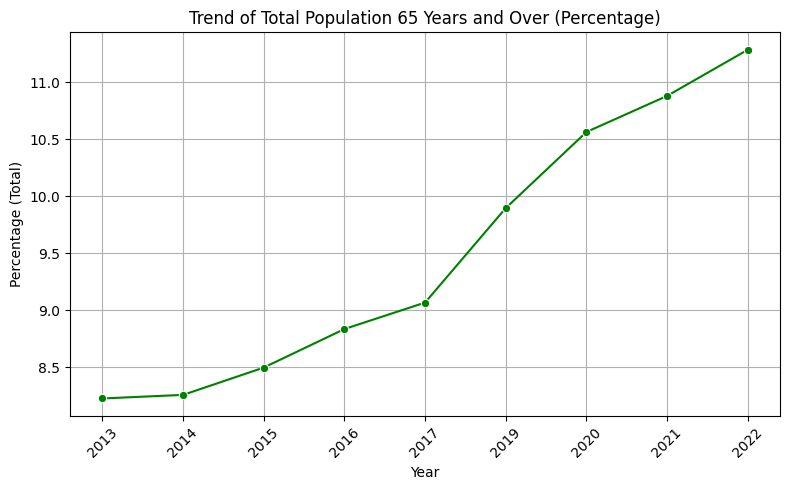

In [631]:
g4 = g4.sort_index(ascending=True)
plt.figure(figsize=(8, 5))
sns.lineplot(data=g4['Percentages_over65'], marker='o', color='green')
plt.title('Trend of Total Population 65 Years and Over (Percentage)')
plt.xlabel('Year')
plt.ylabel('Percentage (Total)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Graph for Trend for Male and Female for D7

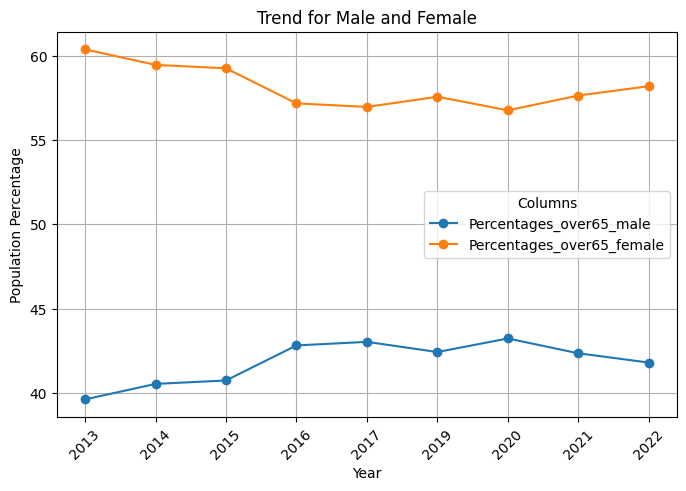

In [633]:
last_two_columns = g4.iloc[:, -2:]

plt.figure(figsize=(8, 5))
for column in last_two_columns.columns:
    plt.plot(last_two_columns.index, last_two_columns[column], marker='o', label=column)

# Add titles and labels
plt.title('Trend for Male and Female')
plt.xlabel('Year')
plt.ylabel('Population Percentage')
plt.legend(title='Columns')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Over 65 Analysis for Boston City

In the following code, the datasets for all the years are imported (filtered for Boston City), then the relevant rows and columns are filtered out and merged in to one final dataset to implement the graph for Boston City.

In [636]:
t_2022 = pd.read_csv('total_2022.csv')
t_2022 = t_2022.drop(columns=['Boston city, Suffolk County, Massachusetts!!Estimate'])
t_2022 = t_2022.rename(columns={'Boston city, Suffolk County, Massachusetts!!Percent': '2022'})
t_2022

,Label (Grouping),2022
0,SEX AND AGE,NaN
1,Total population,"665,945"
2,Male,48.2%
3,Female,51.8%
4,Sex ratio (males per 100 females),(X)
...,...,...
91,Total housing units,(X)
92,"CITIZEN, VOTING AGE POPULATION",NaN
93,"Citizen, 18 and over population","480,676"
94,Male,46.7%


In [637]:
ft_2022 = t_2022.iloc[[1]]
ft_2022

,Label (Grouping),2022
1,Total population,"665,945"


In [638]:
o_2022 = t_2022.iloc[[24]]
o_2022

,Label (Grouping),2022
24,65 years and over,12.3%


In [639]:
total_over65_2022 = t_2022.iloc[30:32]
total_over65_2022

,Label (Grouping),2022
30,Male,42.3%
31,Female,57.7%


In [640]:
over65_2022_t = pd.concat([ft_2022, o_2022, total_over65_2022], ignore_index=True)
over65_2022_t

,Label (Grouping),2022
0,Total population,"665,945"
1,65 years and over,12.3%
2,Male,42.3%
3,Female,57.7%


In [641]:
t_2021 = pd.read_csv('total_2021.csv')
t_2021 = t_2021.drop(columns=['Boston city, Suffolk County, Massachusetts!!Estimate'])
t_2021 = t_2021.rename(columns={'Boston city, Suffolk County, Massachusetts!!Percent': '2021'})
t_2021

,Label (Grouping),2021
0,SEX AND AGE,NaN
1,Total population,"672,814"
2,Male,48.0%
3,Female,52.0%
4,Sex ratio (males per 100 females),(X)
...,...,...
89,Total housing units,(X)
90,"CITIZEN, VOTING AGE POPULATION",NaN
91,"Citizen, 18 and over population","481,137"
92,Male,46.8%


In [642]:
ft_2021 = t_2021.iloc[[1]]

o_2021 = t_2021.iloc[[24]]

total_over65_2021 = t_2021.iloc[30:32]

over65_2021_t = pd.concat([ft_2021, o_2021, total_over65_2021], ignore_index=True)
over65_2021_t

,Label (Grouping),2021
0,Total population,"672,814"
1,65 years and over,11.8%
2,Male,42.2%
3,Female,57.8%


In [643]:
t_2020 = pd.read_csv('total_2020.csv')
t_2020 = t_2020.drop(columns=['Boston city, Suffolk County, Massachusetts!!Estimate'])
t_2020 = t_2020.rename(columns={'Boston city, Suffolk County, Massachusetts!!Percent': '2020'})
t_2020

,Label (Grouping),2020
0,SEX AND AGE,NaN
1,Total population,"689,326"
2,Male,48.0%
3,Female,52.0%
4,Sex ratio (males per 100 females),(X)
...,...,...
89,Total housing units,(X)
90,"CITIZEN, VOTING AGE POPULATION",NaN
91,"Citizen, 18 and over population","490,244"
92,Male,46.8%


In [644]:
ft_2020 = t_2020.iloc[[1]]

o_2020 = t_2020.iloc[[24]]

total_over65_2020 = t_2020.iloc[30:32]

over65_2020_t = pd.concat([ft_2020, o_2020, total_over65_2020], ignore_index=True)
over65_2020_t

,Label (Grouping),2020
0,Total population,"689,326"
1,65 years and over,11.8%
2,Male,41.9%
3,Female,58.1%


In [645]:
t_2019 = pd.read_csv('total_2019.csv')
t_2019 = t_2019.drop(columns=['Boston city, Suffolk County, Massachusetts!!Estimate'])
t_2019 = t_2019.rename(columns={'Boston city, Suffolk County, Massachusetts!!Percent': '2019'})
t_2019

,Label (Grouping),2019
0,SEX AND AGE,NaN
1,Total population,"684,379"
2,Male,48.0%
3,Female,52.0%
4,Sex ratio (males per 100 females),(X)
...,...,...
89,Total housing units,(X)
90,"CITIZEN, VOTING AGE POPULATION",NaN
91,"Citizen, 18 and over population","483,436"
92,Male,46.9%


In [646]:
ft_2019 = t_2019.iloc[[1]]

o_2019 = t_2019.iloc[[24]]

total_over65_2019 = t_2019.iloc[30:32]

over65_2019_t = pd.concat([ft_2019, o_2019, total_over65_2019], ignore_index=True)
over65_2019_t

,Label (Grouping),2019
0,Total population,"684,379"
1,65 years and over,11.5%
2,Male,42.0%
3,Female,58.0%


In [647]:
t_2017 = pd.read_csv('total_2017.csv')
t_2017 = t_2017.drop(columns=['Boston city, Suffolk County, Massachusetts!!Estimate'])
t_2017 = t_2017.rename(columns={'Boston city, Suffolk County, Massachusetts!!Percent': '2017'})
t_2017

,Label (Grouping),2017
0,SEX AND AGE,NaN
1,Total population,"669,158"
2,Male,48.1%
3,Female,51.9%
4,Sex ratio (males per 100 females),(X)
...,...,...
89,Total housing units,(X)
90,"CITIZEN, VOTING AGE POPULATION",NaN
91,"Citizen, 18 and over population","469,582"
92,Male,46.9%


In [648]:
ft_2017 = t_2017.iloc[[1]]

o_2017 = t_2017.iloc[[24]]

total_over65_2017 = t_2017.iloc[30:32]

over65_2017_t = pd.concat([ft_2017, o_2017, total_over65_2017], ignore_index=True)
over65_2017_t

,Label (Grouping),2017
0,Total population,"669,158"
1,65 years and over,11.0%
2,Male,41.8%
3,Female,58.2%


In [649]:
t_2016 = pd.read_csv('total_2016.csv')
t_2016 = t_2016.drop(columns=['Boston city, Suffolk County, Massachusetts!!Estimate'])
t_2016 = t_2016.rename(columns={'Boston city, Suffolk County, Massachusetts!!Percent': '2016'})
t_2016

,Label (Grouping),2016
0,SEX AND AGE,NaN
1,Total population,"658,279"
2,Male,48.0%
3,Female,52.0%
4,Under 5 years,5.3%
...,...,...
84,Total housing units,(X)
85,"CITIZEN, VOTING AGE POPULATION",NaN
86,"Citizen, 18 and over population","460,739"
87,Male,46.8%


In [650]:
ft_2016 = t_2016.iloc[[1]]

o_2016 = t_2016.iloc[[21]]

total_over65_2016 = t_2016.iloc[26:28]

over65_2016_t = pd.concat([ft_2016, o_2016, total_over65_2016], ignore_index=True)
over65_2016_t

,Label (Grouping),2016
0,Total population,"658,279"
1,65 years and over,10.7%
2,Male,41.5%
3,Female,58.5%


In [651]:
t_2015 = pd.read_csv('total_2015.csv')
t_2015 = t_2015.drop(columns=['Boston city, Suffolk County, Massachusetts!!Estimate'])
t_2015 = t_2015.rename(columns={'Boston city, Suffolk County, Massachusetts!!Percent': '2015'})
t_2015

,Label (Grouping),2015
0,SEX AND AGE,NaN
1,Total population,"650,281"
2,Male,48.0%
3,Female,52.0%
4,Under 5 years,5.4%
...,...,...
84,Total housing units,(X)
85,"CITIZEN, VOTING AGE POPULATION",NaN
86,"Citizen, 18 and over population","455,312"
87,Male,46.5%


In [652]:
ft_2015 = t_2015.iloc[[1]]

o_2015 = t_2015.iloc[[21]]

total_over65_2015 = t_2015.iloc[26:28]

over65_2015_t = pd.concat([ft_2015, o_2015, total_over65_2015], ignore_index=True)
over65_2015_t

,Label (Grouping),2015
0,Total population,"650,281"
1,65 years and over,10.5%
2,Male,41.3%
3,Female,58.7%


In [653]:
t_2014 = pd.read_csv('total_2014.csv')
t_2014 = t_2014.drop(columns=['Boston city, Suffolk County, Massachusetts!!Estimate'])
t_2014 = t_2014.rename(columns={'Boston city, Suffolk County, Massachusetts!!Percent': '2014'})
t_2014

,Label (Grouping),2014
0,SEX AND AGE,NaN
1,Total population,"639,594"
2,Male,47.8%
3,Female,52.2%
4,Under 5 years,5.3%
...,...,...
80,Some other race alone,1.3%
81,Two or more races,2.3%
82,Two races including Some other...,0.4%
83,Two races excluding Some other...,1.9%


In [654]:
ft_2014 = t_2014.iloc[[1]]

o_2014 = t_2014.iloc[[21]]

total_over65_2014 = t_2014.iloc[26:28]

over65_2014_t = pd.concat([ft_2014, o_2014, total_over65_2014], ignore_index=True)
over65_2014_t

,Label (Grouping),2014
0,Total population,"639,594"
1,65 years and over,10.4%
2,Male,41.1%
3,Female,58.9%


In [655]:
t_2013 = pd.read_csv('total_2013.csv')
t_2013 = t_2013.drop(columns=['Boston city, Suffolk County, Massachusetts!!Estimate'])
t_2013 = t_2013.rename(columns={'Boston city, Suffolk County, Massachusetts!!Percent': '2013'})
t_2013

,Label (Grouping),2013
0,SEX AND AGE,NaN
1,Total population,"629,182"
2,Male,47.8%
3,Female,52.2%
4,Under 5 years,5.3%
...,...,...
80,Some other race alone,1.3%
81,Two or more races,2.2%
82,Two races including Some other...,0.3%
83,Two races excluding Some other...,1.8%


In [656]:
ft_2013 = t_2013.iloc[[1]]

o_2013 = t_2013.iloc[[21]]

total_over65_2013 = t_2013.iloc[26:28]

over65_2013_t = pd.concat([ft_2013, o_2013, total_over65_2013], ignore_index=True)
over65_2013_t

,Label (Grouping),2013
0,Total population,"629,182"
1,65 years and over,10.3%
2,Male,41.0%
3,Female,59.0%


In [657]:
m1 = pd.merge(over65_2022_t, over65_2021_t, on='Label (Grouping)')
m1

,Label (Grouping),2022,2021
0,Total population,"665,945","672,814"
1,65 years and over,12.3%,11.8%
2,Male,42.3%,42.2%
3,Female,57.7%,57.8%


In [658]:
m2 = pd.merge(m1, over65_2020_t, on='Label (Grouping)')
m2

,Label (Grouping),2022,2021,2020
0,Total population,"665,945","672,814","689,326"
1,65 years and over,12.3%,11.8%,11.8%
2,Male,42.3%,42.2%,41.9%
3,Female,57.7%,57.8%,58.1%


In [659]:
m3 = pd.merge(m2, over65_2019_t, on='Label (Grouping)')
m3

,Label (Grouping),2022,2021,2020,2019
0,Total population,"665,945","672,814","689,326","684,379"
1,65 years and over,12.3%,11.8%,11.8%,11.5%
2,Male,42.3%,42.2%,41.9%,42.0%
3,Female,57.7%,57.8%,58.1%,58.0%


In [660]:
m4 = pd.merge(m3, over65_2017_t, on='Label (Grouping)')
m4

,Label (Grouping),2022,2021,2020,2019,2017
0,Total population,"665,945","672,814","689,326","684,379","669,158"
1,65 years and over,12.3%,11.8%,11.8%,11.5%,11.0%
2,Male,42.3%,42.2%,41.9%,42.0%,41.8%
3,Female,57.7%,57.8%,58.1%,58.0%,58.2%


In [661]:
m5 = pd.merge(over65_2016_t, over65_2015_t, on='Label (Grouping)')
m5

,Label (Grouping),2016,2015
0,Total population,"658,279","650,281"
1,65 years and over,10.7%,10.5%
2,Male,41.5%,41.3%
3,Female,58.5%,58.7%


In [662]:
m6 = pd.merge(m5, over65_2014_t, on='Label (Grouping)')
m6

,Label (Grouping),2016,2015,2014
0,Total population,"658,279","650,281","639,594"
1,65 years and over,10.7%,10.5%,10.4%
2,Male,41.5%,41.3%,41.1%
3,Female,58.5%,58.7%,58.9%


In [663]:
m7 = pd.merge(m6, over65_2013_t, on='Label (Grouping)')
m7

,Label (Grouping),2016,2015,2014,2013
0,Total population,"658,279","650,281","639,594","629,182"
1,65 years and over,10.7%,10.5%,10.4%,10.3%
2,Male,41.5%,41.3%,41.1%,41.0%
3,Female,58.5%,58.7%,58.9%,59.0%


In [664]:
m4

,Label (Grouping),2022,2021,2020,2019,2017
0,Total population,"665,945","672,814","689,326","684,379","669,158"
1,65 years and over,12.3%,11.8%,11.8%,11.5%,11.0%
2,Male,42.3%,42.2%,41.9%,42.0%,41.8%
3,Female,57.7%,57.8%,58.1%,58.0%,58.2%


In [665]:
m7 = m7.drop(columns=['Label (Grouping)'])
m7

,2016,2015,2014,2013
0,"658,279","650,281","639,594","629,182"
1,10.7%,10.5%,10.4%,10.3%
2,41.5%,41.3%,41.1%,41.0%
3,58.5%,58.7%,58.9%,59.0%


In [666]:
boston_over65 = pd.concat([m4, m7], axis=1)
boston_over65

,Label (Grouping),2022,2021,2020,2019,2017,2016,2015,2014,2013
0,Total population,"665,945","672,814","689,326","684,379","669,158","658,279","650,281","639,594","629,182"
1,65 years and over,12.3%,11.8%,11.8%,11.5%,11.0%,10.7%,10.5%,10.4%,10.3%
2,Male,42.3%,42.2%,41.9%,42.0%,41.8%,41.5%,41.3%,41.1%,41.0%
3,Female,57.7%,57.8%,58.1%,58.0%,58.2%,58.5%,58.7%,58.9%,59.0%


## Implementing graphs for Boston City

In [668]:
g1 = boston_over65.iloc[[1, 2, 3]].copy()

# Remove the '%' sign and convert to numeric values
for col in g1.columns[1:]:
    g1[col] = g1[col].str.rstrip('%').astype(float)

# Set the labels as the index
g1.set_index('Label (Grouping)', inplace=True)

# Transpose the dataframe for plotting
g1 = g1.T
g1

Label (Grouping),65 years and over,Male,Female
2022,12.3,42.3,57.7
2021,11.8,42.2,57.8
2020,11.8,41.9,58.1
2019,11.5,42.0,58.0
2017,11.0,41.8,58.2
2016,10.7,41.5,58.5
2015,10.5,41.3,58.7
2014,10.4,41.1,58.9
2013,10.3,41.0,59.0


In [669]:
g1.columns = g1.columns.str.strip()
g1.columns

Index(['65 years and over', 'Male', 'Female'], dtype='object', name='Label (Grouping)')

## Graph for Trend of Total Population 65 Years and Over for Boston city

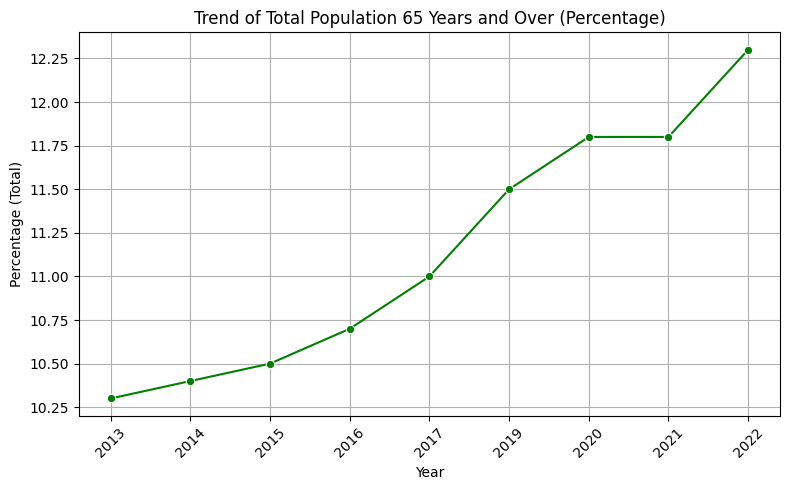

In [671]:
g1 = g1.sort_index(ascending=True)
plt.figure(figsize=(8, 5))
sns.lineplot(data=g1['65 years and over'], marker='o', color='green')
plt.title('Trend of Total Population 65 Years and Over (Percentage)')
plt.xlabel('Year')
plt.ylabel('Percentage (Total)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Graph for Trend for Male and Female for Boston city

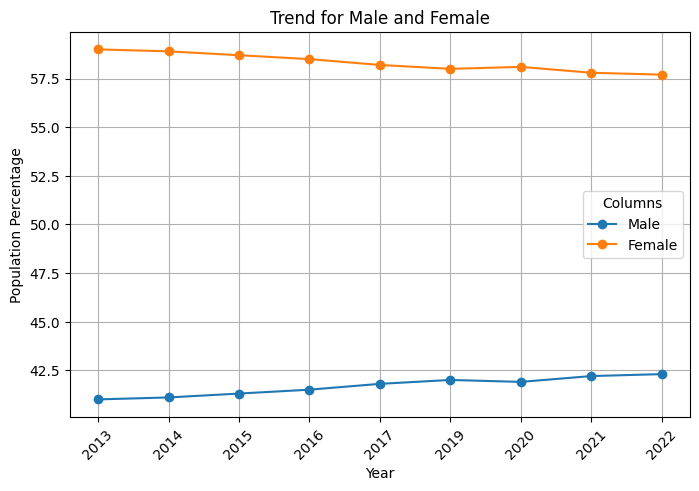

In [673]:
last_two_columns = g1.iloc[:, -2:]

plt.figure(figsize=(8, 5))
for column in last_two_columns.columns:
    plt.plot(last_two_columns.index, last_two_columns[column], marker='o', label=column)

# Add titles and labels
plt.title('Trend for Male and Female')
plt.xlabel('Year')
plt.ylabel('Population Percentage')
plt.legend(title='Columns')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Comparing District 7 to Boston City

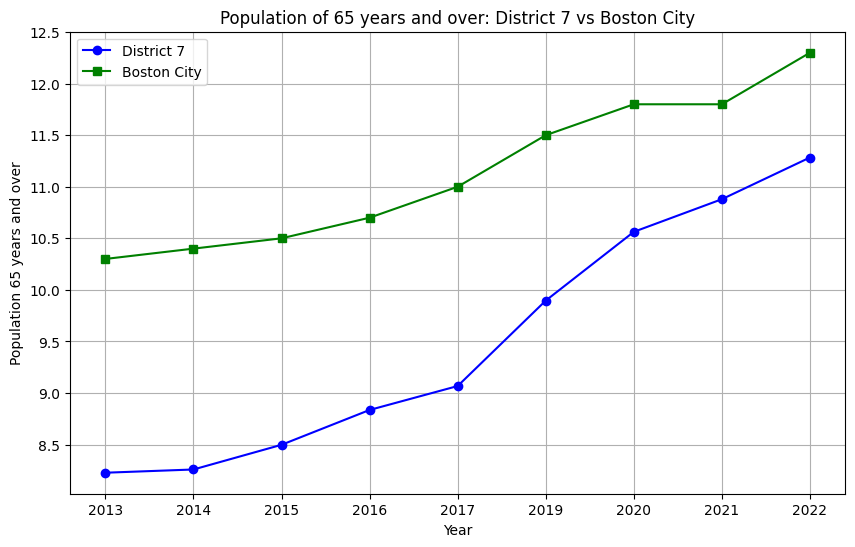

In [675]:
plt.figure(figsize=(10, 6))

# Plot for District 7
plt.plot(g4['Percentages_over65'], label='District 7', color='blue', marker='o')

# Plot for Boston City
plt.plot(g1['65 years and over'], label='Boston City', color='green', marker='s')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population 65 years and over')
plt.title('Population of 65 years and over: District 7 vs Boston City')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


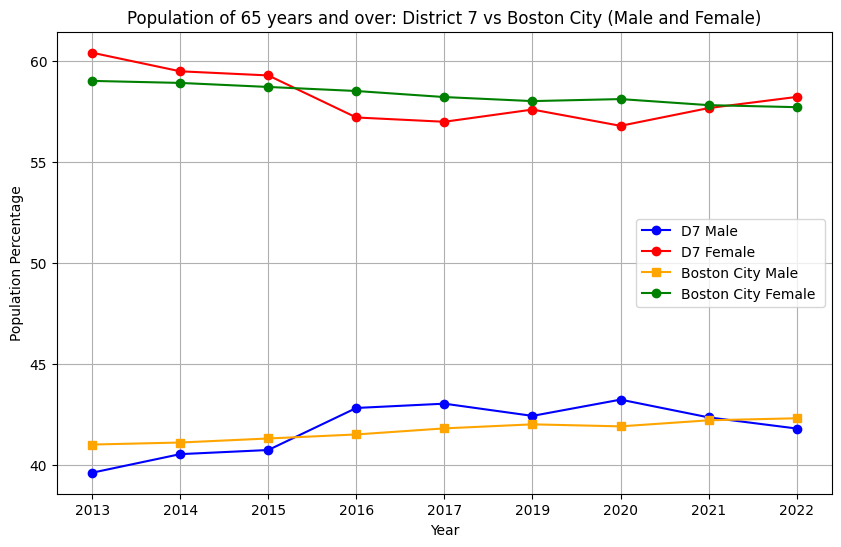

In [676]:
plt.figure(figsize=(10, 6))

# Plot for District 7
plt.plot(g4['Percentages_over65_male'], label='D7 Male', color='blue', marker='o')
plt.plot(g4['Percentages_over65_female'], label='D7 Female', color='red', marker='o')

# Plot for Boston City
plt.plot(g1['Male'], label='Boston City Male', color='orange', marker='s')
plt.plot(g1['Female'], label='Boston City Female ', color='green', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population Percentage')
plt.title('Population of 65 years and over: District 7 vs Boston City (Male and Female)')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()